# DISK SCHEDULING ALGORITHM 

## Import libraries and algorithm

In [201]:
import random
import matplotlib.pyplot as plt
import numpy as np
from algorithm.scan import SCAN
from algorithm.cscan import CSCAN
from algorithm.clook import CLOOK

## Initialization

In [202]:
#initialization - change this according to your need
disk_size = 200
head = 50
direction = "left"
random_request = [10, 20, 50, 100]

## Ganerate random seek sequence and store their average seek time, worst-case seek time and seek sequence

In [203]:
# Store averages
avg_seek_time_SCAN = []  
avg_seek_time_CSCAN = [] 
avg_seek_time_CLOOK = []

# Store worst case
worst_seek_time_SCAN = []  
worst_seek_time_CSCAN = [] 
worst_seek_time_CLOOK = []

# Store seek sequences for each algorithm and request size
seek_sequences = {
    10: {
        'SCAN': [],
        'CSCAN': [],
        'CLOOK': []
    },
    20: {
        'SCAN': [],
        'CSCAN': [],
        'CLOOK': []
    },
    50: {
        'SCAN': [],
        'CSCAN': [],
        'CLOOK': []
    },
    100: {
        'SCAN': [],
        'CSCAN': [],
        'CLOOK': []
    }
}

for size in random_request:
    # Generate 'size' random requests
    arr = [random.randint(0, disk_size-1) for _ in range(size)]

    print(f"\nRequest Size: {size}")
    print('----------------')


    print("\nSCAN algorithm")
    scan_avg, scan_worst, seek_sequence = SCAN(disk_size, arr, head, direction)

    # Store all average in avg_seek_time_SCAN
    avg_seek_time_SCAN.append(scan_avg)
    # Store all worst seek time in worst_seek_time_SCAN
    worst_seek_time_SCAN.append(scan_worst)
    # Store seek sequence
    seek_sequences[size]['SCAN'].extend (seek_sequence)



    print("\n\nC-SCAN algorithm")
    cscan_avg, cscan_worst, seek_sequence = CSCAN(disk_size, arr, head)

     # Store all average in avg_seek_time_CSCAN
    avg_seek_time_CSCAN.append(cscan_avg)
    # Store all worst seek time in worst_seek_time_SCAN
    worst_seek_time_CSCAN.append(cscan_worst)
    # Store seek sequence
    seek_sequences[size]['CSCAN'].extend (seek_sequence)




    print("\n\nC-LOOK algorithm")
    clook_avg, clook_worst, seek_sequence = CLOOK(arr, head)

    # Store all average in avg_seek_time_CLOOK
    avg_seek_time_CLOOK.append(clook_avg)
    # Store all worst seek time in worst_seek_time_SCAN
    worst_seek_time_CLOOK.append(clook_worst)
    # Store seek sequence
    seek_sequences[size]['CLOOK'].extend (seek_sequence)


    print()
    print("===========================================================================================================================================================================================================")



Request Size: 10
----------------

SCAN algorithm
Total number of seek operations = 235
Average seek time = 19.583333333333332
Worst-case seek time = 64
Seek Sequence is:  50, 43, 0, 64, 98, 103, 121, 127, 137, 138, 157, 185


C-SCAN algorithm
Total number of seek operations = 391
Average seek time = 30.076923076923077
Worst-case seek time = 199
Seek Sequence is:  50, 64, 98, 103, 121, 127, 137, 138, 157, 185, 199, 0, 43


C-LOOK algorithm
Total number of seek operations = 277
Average seek time = 25.181818181818183
Worst-case seek time = 142
Seek Sequence is:  50, 64, 98, 103, 121, 127, 137, 138, 157, 185, 43


Request Size: 20
----------------

SCAN algorithm
Total number of seek operations = 240
Average seek time = 10.909090909090908
Worst-case seek time = 52
Seek Sequence is:  50, 45, 41, 20, 0, 52, 67, 83, 89, 93, 101, 107, 113, 133, 142, 160, 160, 162, 169, 181, 183, 190


C-SCAN algorithm
Total number of seek operations = 393
Average seek time = 17.08695652173913
Worst-case seek

## Plot graph to compare Average Seek Time between SCAN, CSCAN and CLOOK

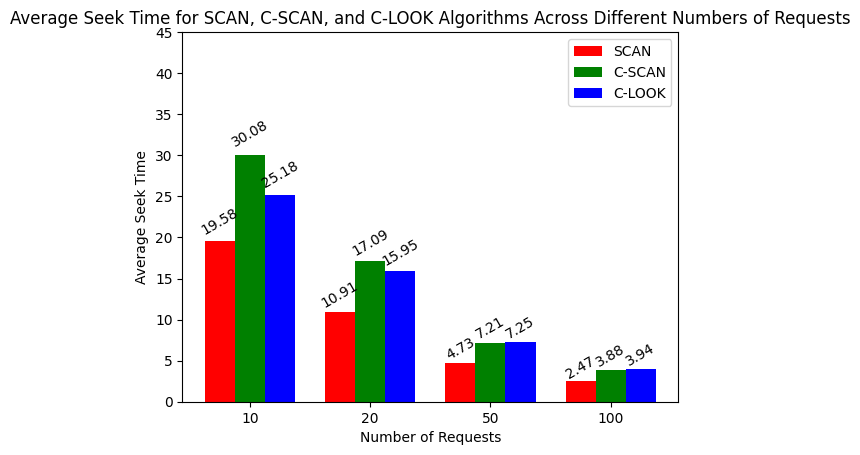

In [204]:
# Set up the bar chart
labels = ['10', '20', '50', '100']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width, avg_seek_time_SCAN, width, label='SCAN' , color='red')
rects2 = ax.bar(x, avg_seek_time_CSCAN, width, label='C-SCAN' , color='green' )
rects3 = ax.bar(x + width, avg_seek_time_CLOOK, width, label='C-LOOK' , color='blue')


# Labelling
ax.set_xlabel('Number of Requests')
ax.set_ylabel('Average Seek Time')
ax.set_title('Average Seek Time for SCAN, C-SCAN, and C-LOOK Algorithms Across Different Numbers of Requests')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


# Set the y-axis limit
ax.set_ylim(0, 45)


# Function to add label on bar chart
# Function to add label on bar chart
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.02*height,
                '%.2f' % float(height),
                ha='center', va='bottom', rotation=30)

# Call function to add label
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.show()

## Plot graph to compare Worst-Case Seek Time between SCAN, CSCAN and CLOOK

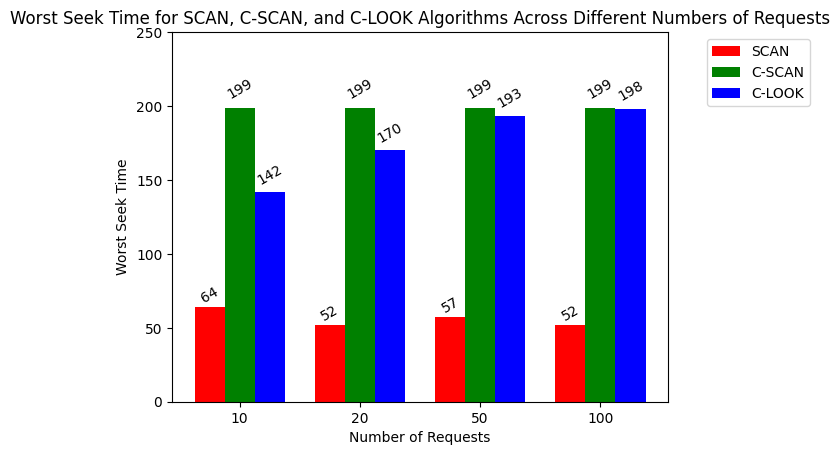

In [205]:
# Set up the bar chart
labels = ['10', '20', '50', '100']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, worst_seek_time_SCAN, width, label='SCAN', color='red')
rects2 = ax.bar(x, worst_seek_time_CSCAN, width, label='C-SCAN', color='green')
rects3 = ax.bar(x + width, worst_seek_time_CLOOK, width, label='C-LOOK', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Requests')
ax.set_ylabel('Worst Seek Time')
ax.set_title('Worst Seek Time for SCAN, C-SCAN, and C-LOOK Algorithms Across Different Numbers of Requests')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Legend placement
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Set the y-axis limit
ax.set_ylim(0, 250)

def autolabel2(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.02*height,
                '%.f' % int(height),
                ha='center', va='bottom', rotation=30)

# Call function to add label
autolabel2(rects1)
autolabel2(rects2)
autolabel2(rects3)

plt.show()

## Define Graph Plotting for Seek Sequence 

In [206]:
def plot_seek_sequence(seek_sequence, algorithm, size):
    y = [i for i in range(len(seek_sequence))]

    # Increase the figure size
    plt.figure(figsize=(20, 6))

    plt.plot(seek_sequence, y)  # Plot the chart

    plt.gca().invert_yaxis()  # Invert y-axis

    # Move x-axis to top
    plt.gca().xaxis.tick_top()
    plt.gca().xaxis.set_label_position('top')

    # Set x-axis limit
    plt.xticks(seek_sequence, rotation = 45, fontsize = 8)

    # Set color based on algorithm
    if algorithm == 'SCAN':
        graph_color = 'red'
    elif algorithm == 'C-SCAN':
        graph_color = 'green'
    elif algorithm == 'C-LOOK':
        graph_color = 'blue'


    # Add arrows pointing to the next point
    for i in range(len(seek_sequence)):
        if i < len(seek_sequence) - 1:
            plt.annotate('', xy=(seek_sequence[i + 1], y[i + 1]), xytext=(seek_sequence[i], y[i]),
                        arrowprops=dict(arrowstyle='->', color = graph_color, shrinkA=0, shrinkB=0))

    # Check if the point is at the leftmost
    if min(seek_sequence) in seek_sequence:
        plt.axvline(x=min(seek_sequence), linestyle='dotted', color='black')  # Draw a vertical dotted line
        plt.text(min(seek_sequence) + 1, 1, f'x = {min(seek_sequence)}', color='black', ha='left')  # Add text for x value

    # Check if the point is at the rightmost
    if max(seek_sequence) in seek_sequence:
        plt.axvline(x=max(seek_sequence), linestyle='dotted', color='black')  # Draw a vertical dotted line
        plt.text(max(seek_sequence)+1, 1, f'x = {max(seek_sequence)}', color='black', ha='left')  # Add text for x value

    plt.title(f"Seek Sequence for {algorithm} (Size: {size})")  # Add title

    plt.show()  # display


## Plot Graph for 10 Random Request

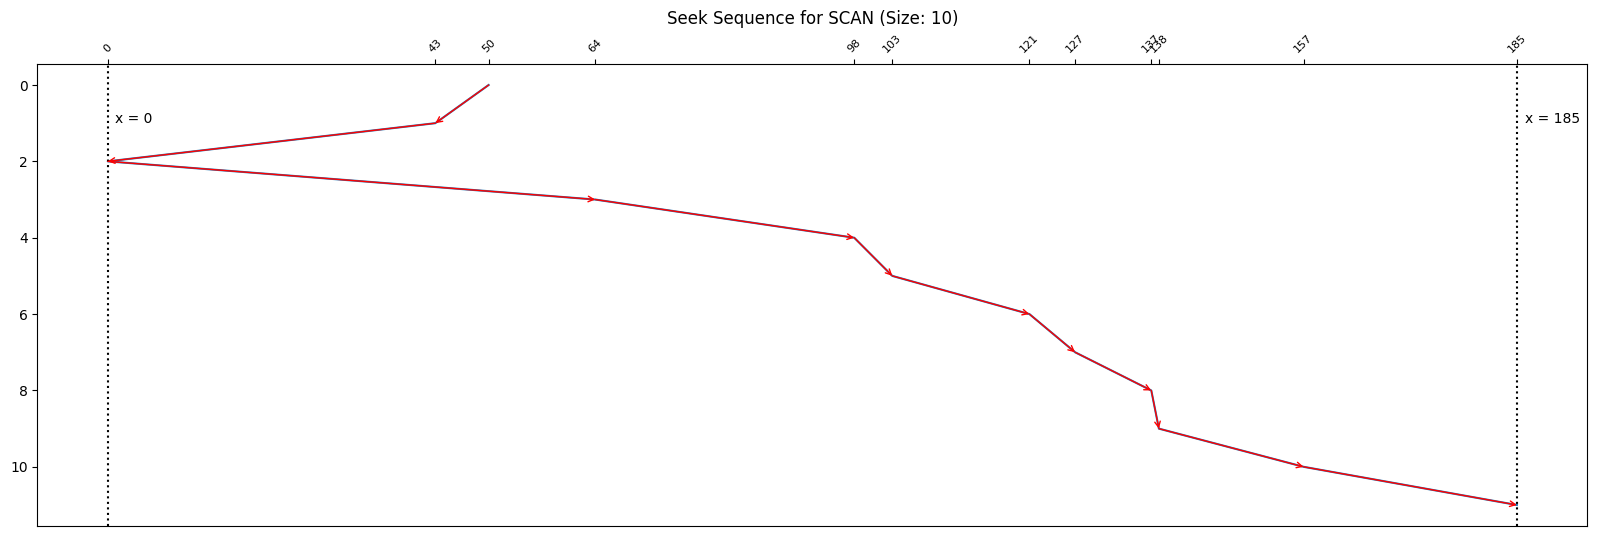

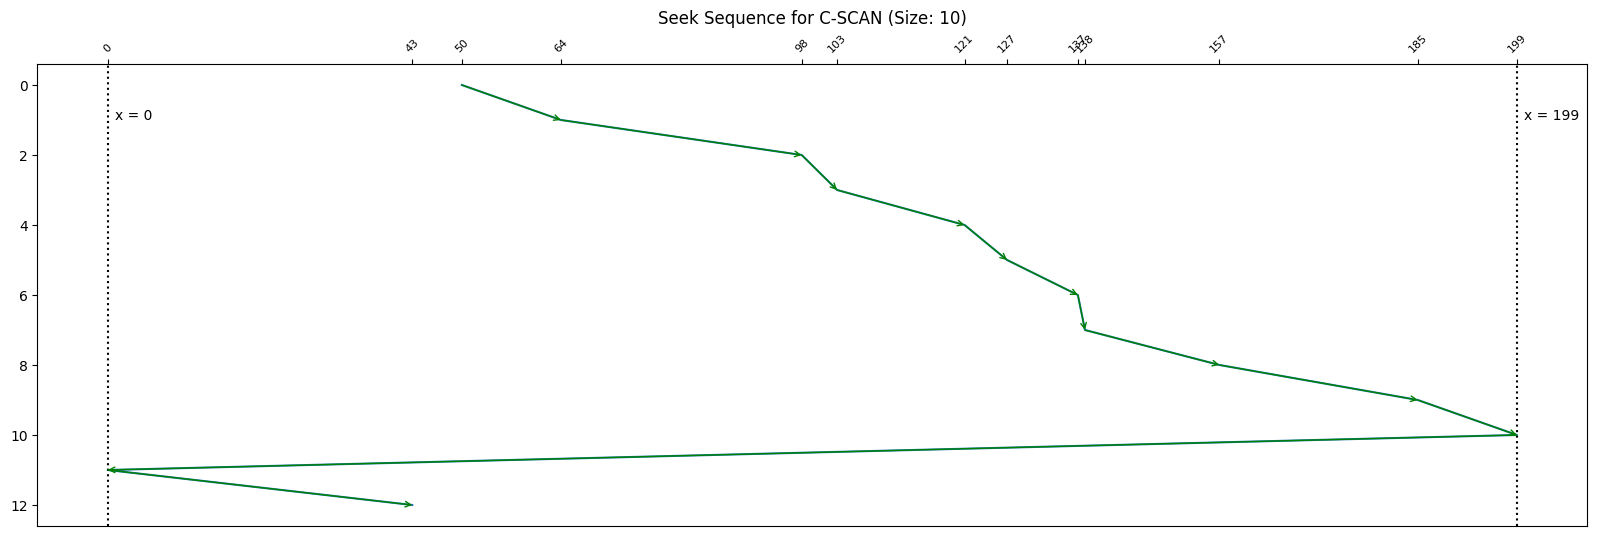

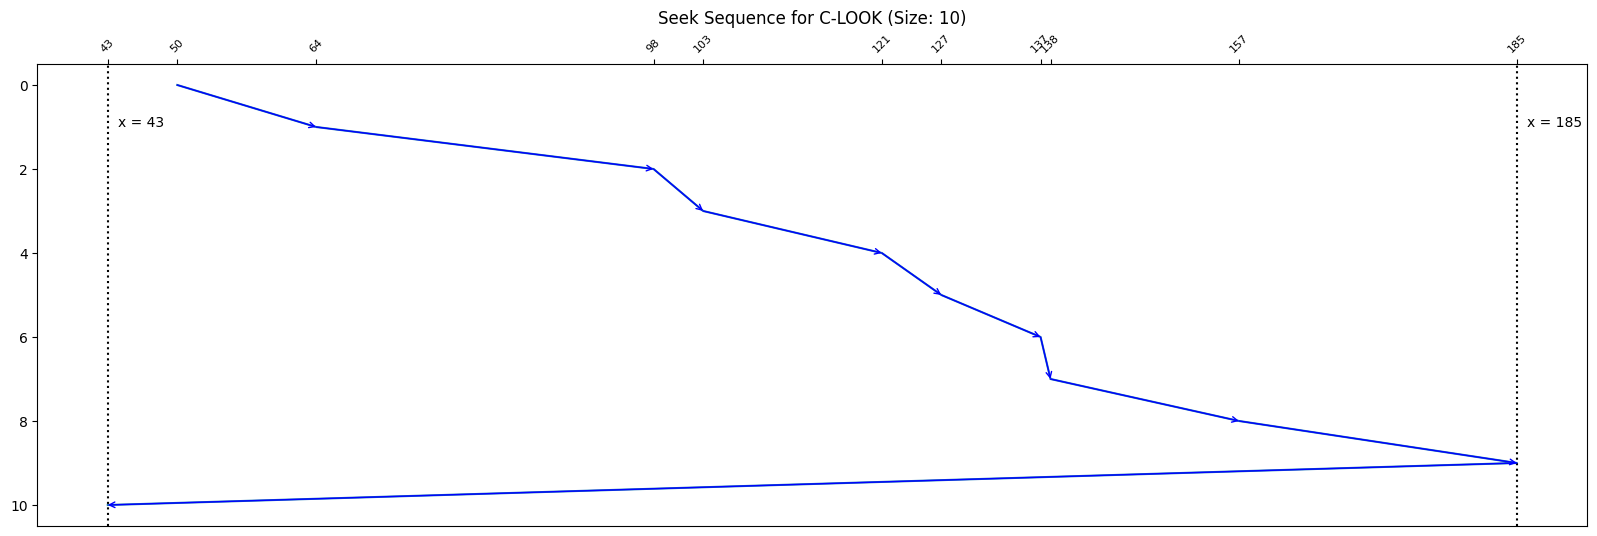

In [207]:
plot_seek_sequence(seek_sequences[10]['SCAN'], 'SCAN', 10)
plot_seek_sequence(seek_sequences[10]['CSCAN'], 'C-SCAN', 10)
plot_seek_sequence(seek_sequences[10]['CLOOK'], 'C-LOOK', 10)

## Plot Graph for 20 Random Request

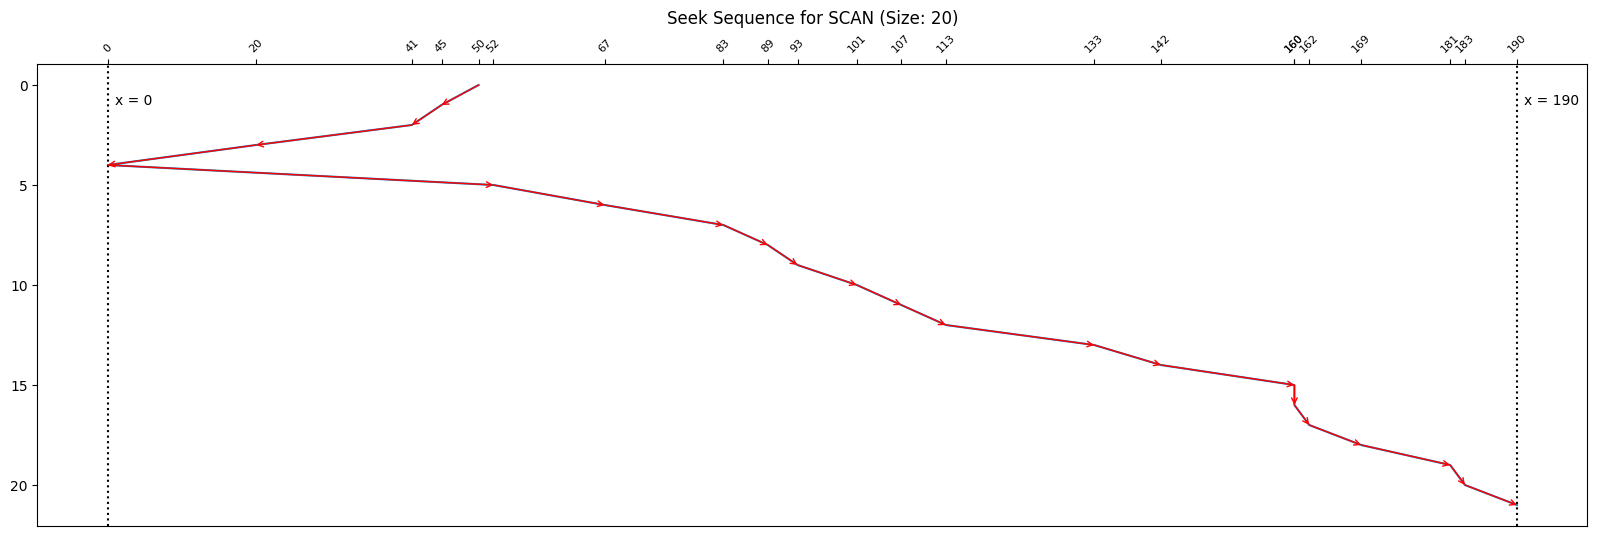

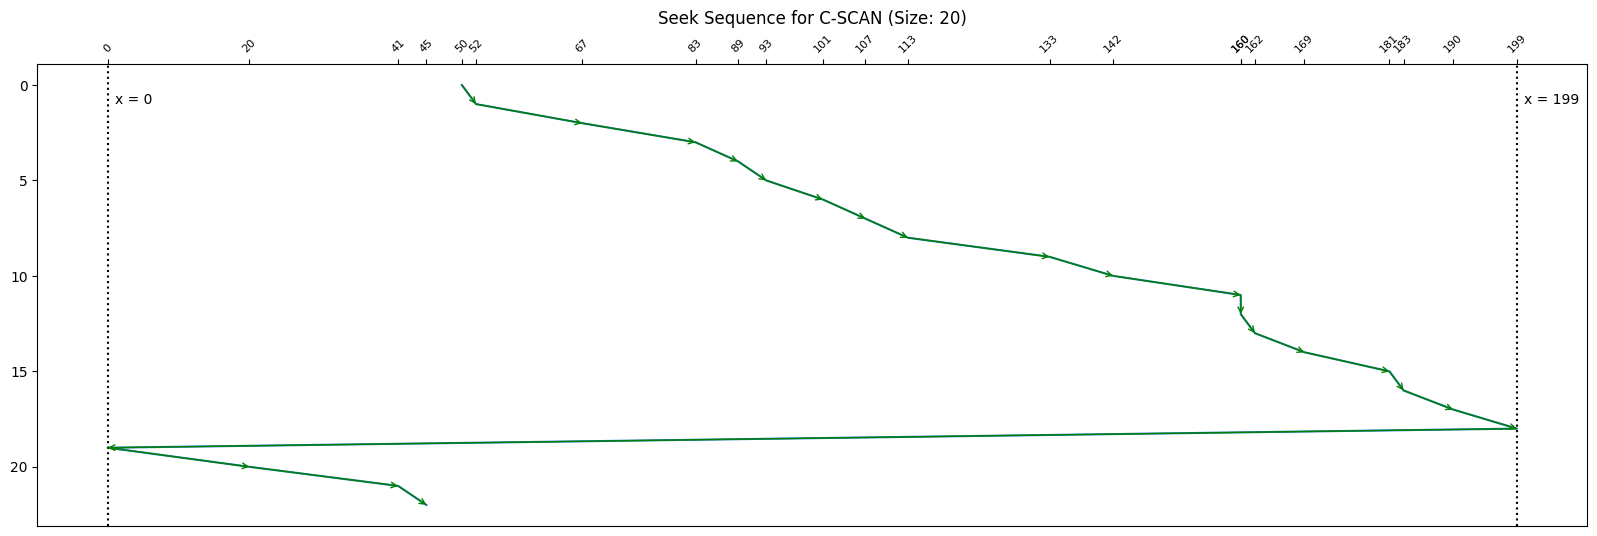

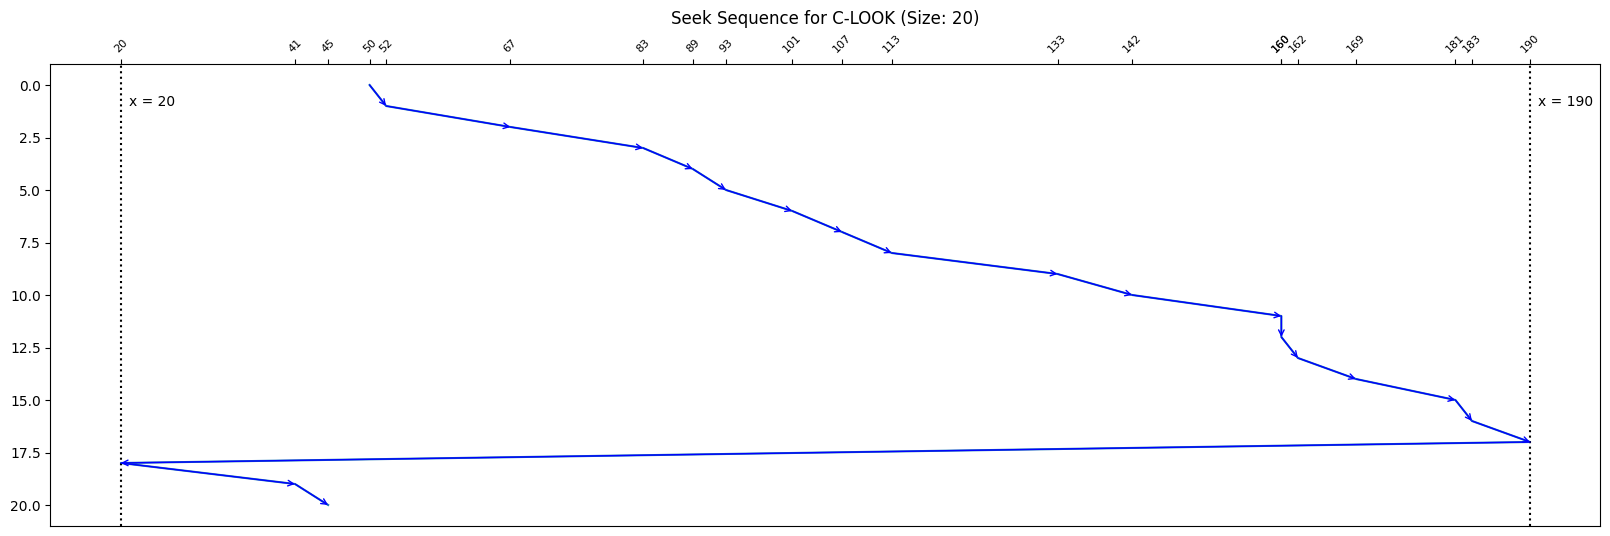

In [208]:
plot_seek_sequence(seek_sequences[20]['SCAN'], 'SCAN', 20)
plot_seek_sequence(seek_sequences[20]['CSCAN'], 'C-SCAN', 20)
plot_seek_sequence(seek_sequences[20]['CLOOK'], 'C-LOOK', 20)

## Plot Graph for 50 Random Request

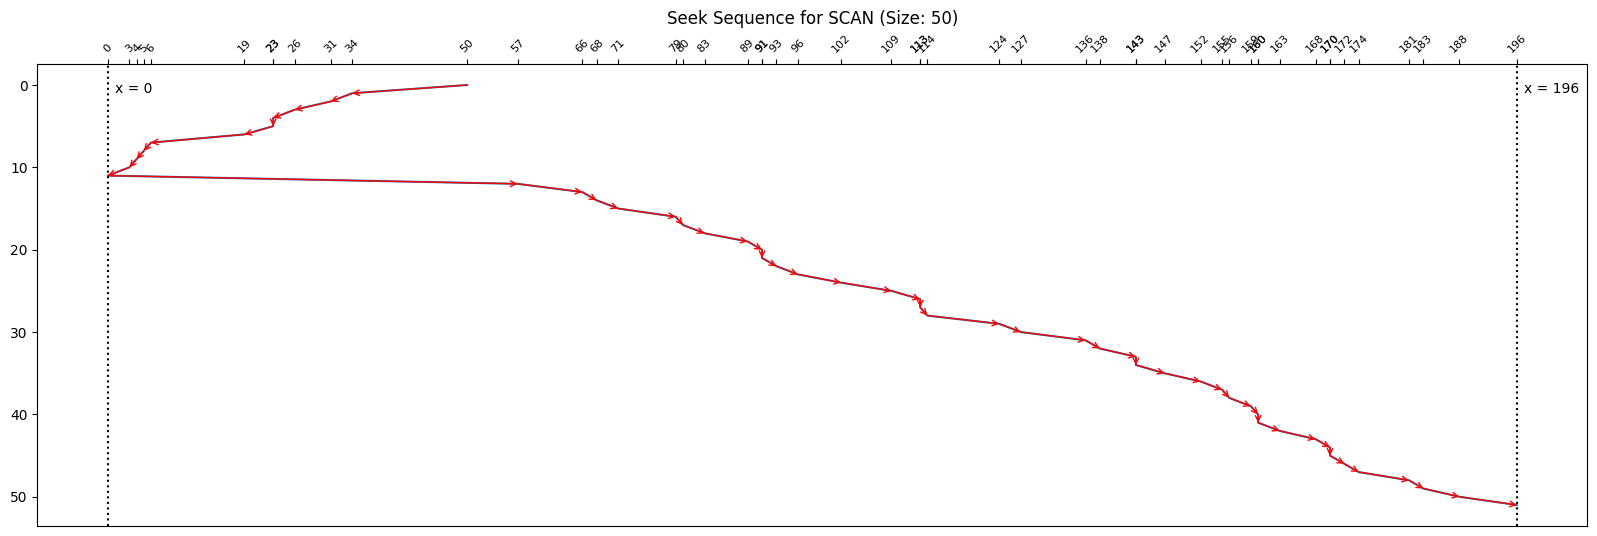

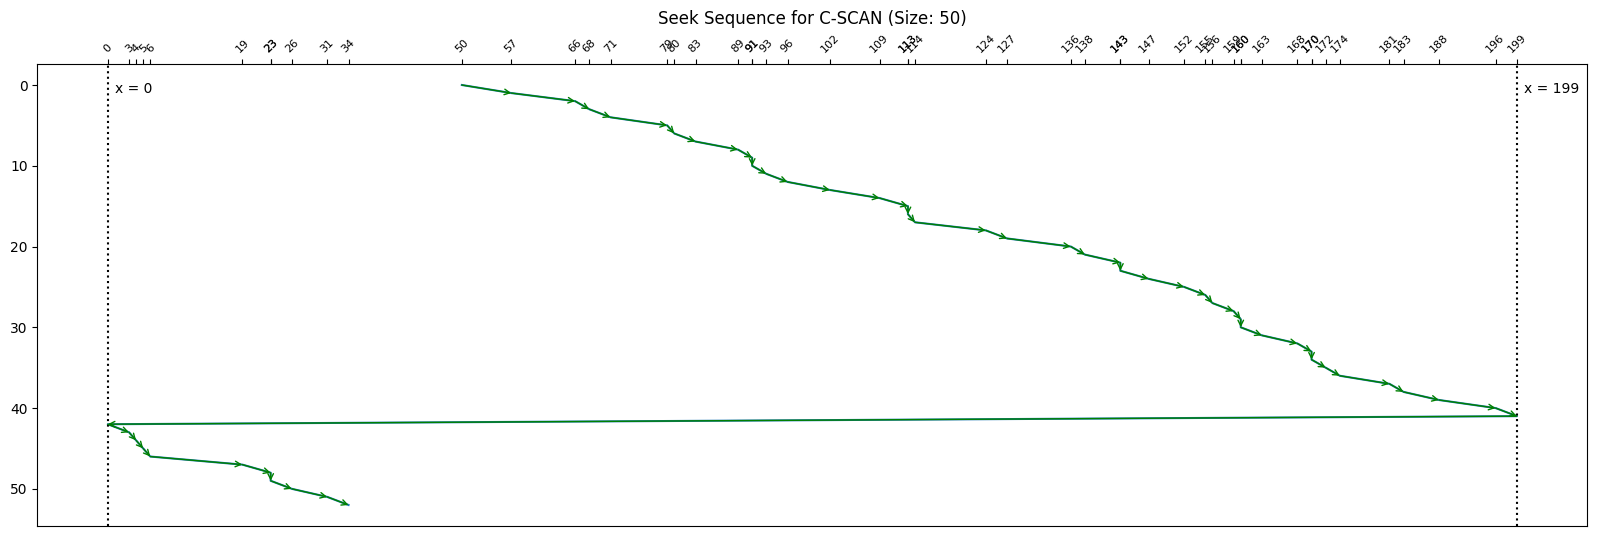

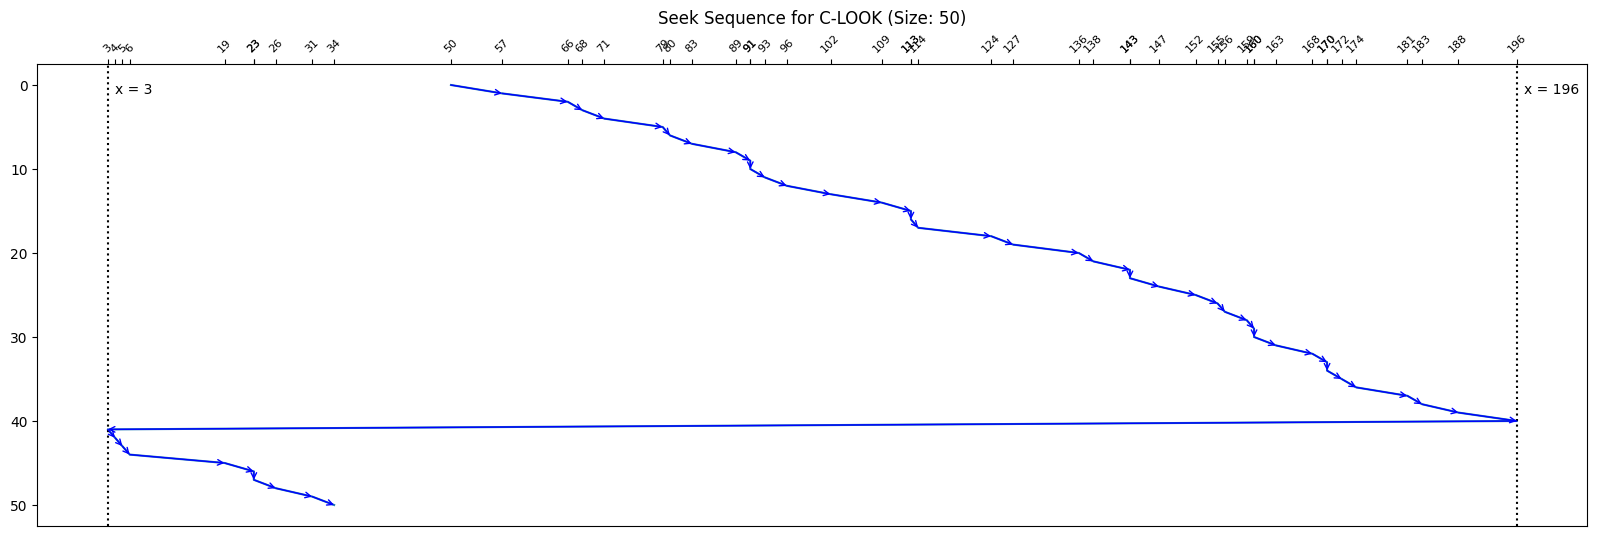

In [209]:
plot_seek_sequence(seek_sequences[50]['SCAN'], 'SCAN', 50)
plot_seek_sequence(seek_sequences[50]['CSCAN'], 'C-SCAN', 50)
plot_seek_sequence(seek_sequences[50]['CLOOK'], 'C-LOOK', 50)

## Plot Graph for 100 Random Request

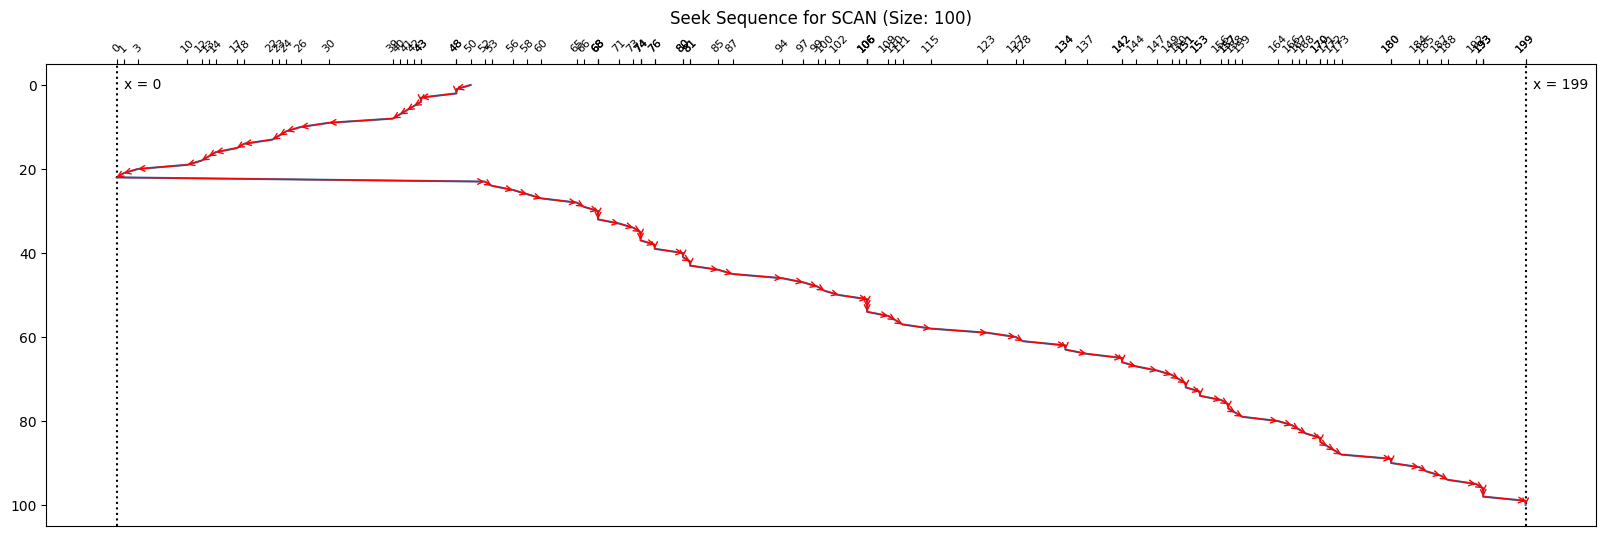

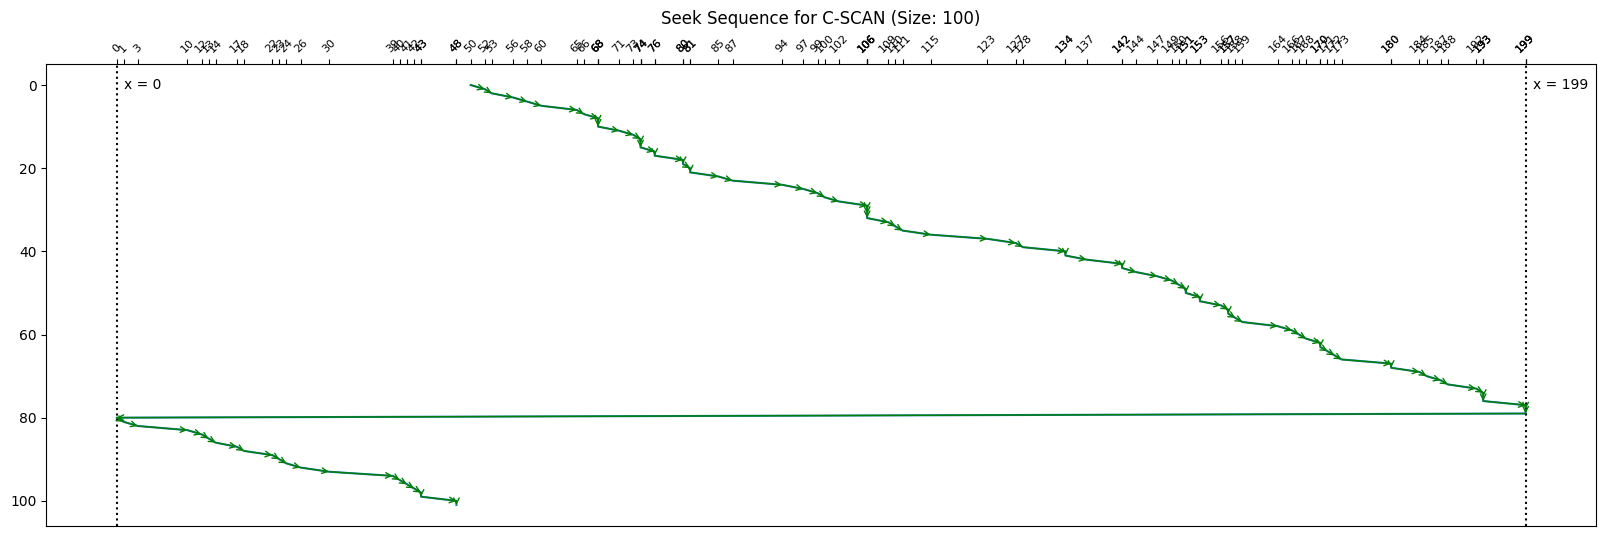

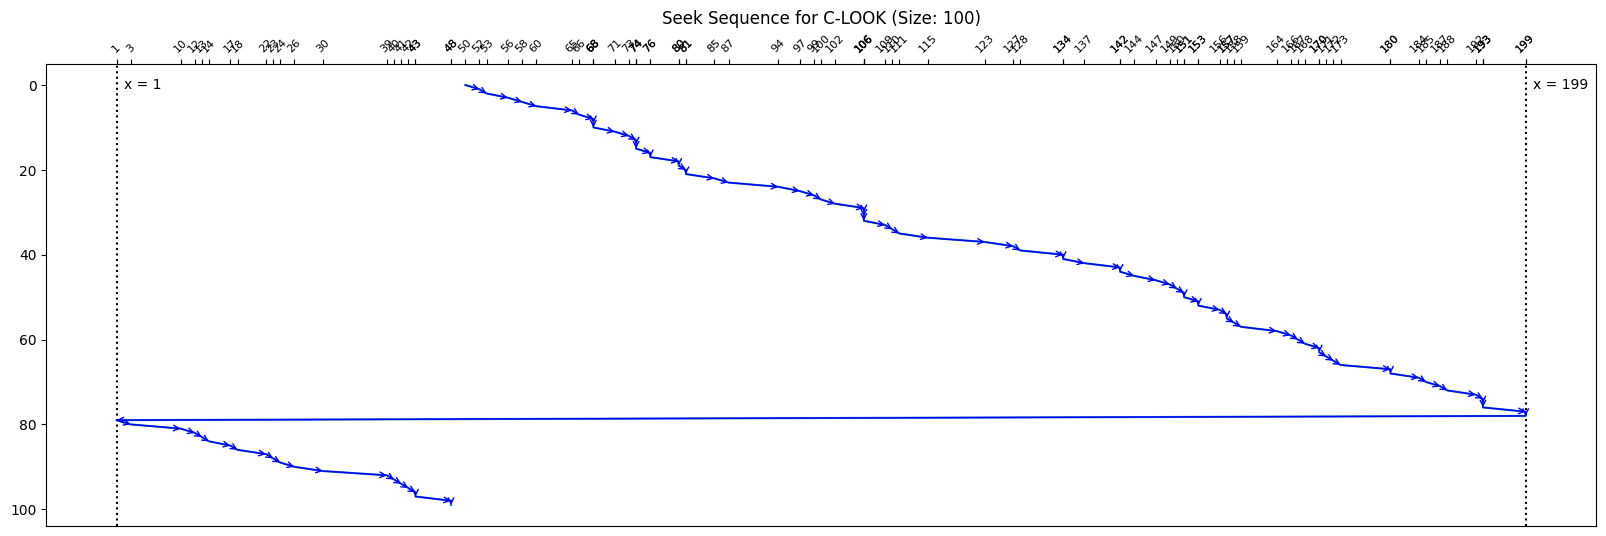

In [210]:
plot_seek_sequence(seek_sequences[100]['SCAN'], 'SCAN', 100)
plot_seek_sequence(seek_sequences[100]['CSCAN'], 'C-SCAN', 100)
plot_seek_sequence(seek_sequences[100]['CLOOK'], 'C-LOOK', 100)